In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
auction_data=pd.read_csv('./2022iplauctions.csv')
auction_data

,Player Name,Country,Role,Base_Price,Selling_Price,Team,Bid,Team_ID
0,Mahipal Lomror,India,ALL-ROUNDER,4000000,9500000,Royal Challengers Bangalore,SOLD,RCB
1,K Gowtham,India,ALL-ROUNDER,5000000,9000000,Lucknow Super Giants,SOLD,LSG
2,Kagiso Rabada,South Africa,BOWLER,20000000,92500000,Punjab Kings,SOLD,PK
3,Shahrukh Khan,India,ALL-ROUNDER,4000000,90000000,Punjab Kings,SOLD,PK
4,Rahul Tewatia,India,ALL-ROUNDER,4000000,90000000,Gujarat Titans,SOLD,GT
...,...,...,...,...,...,...,...,...
585,Sisanda Magala,South Africa,ALL-ROUNDER,5000000,0,N.A.,UNSOLD,N.A.
586,Andile Phehlukwayo,South Africa,ALL-ROUNDER,5000000,0,N.A.,UNSOLD,N.A.
587,Seekkuge Prasanna,Sri Lanka,ALL-ROUNDER,5000000,0,N.A.,UNSOLD,N.A.
588,Raymon Reifer,West Indies,ALL-ROUNDER,5000000,0,N.A.,UNSOLD,N.A.


In [6]:
auction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player Name    590 non-null    object
 1   Country        590 non-null    object
 2   Role           590 non-null    object
 3   Base_Price     590 non-null    int64 
 4   Selling_Price  590 non-null    int64 
 5   Team           590 non-null    object
 6   Bid            590 non-null    object
 7   Team_ID        590 non-null    object
dtypes: int64(2), object(6)
memory usage: 23.1+ KB


In [7]:
print("Unique values in 'Bid' column:", auction_data['Bid'].unique())

Unique values in 'Bid' column: ['SOLD' 'UNSOLD']


In [8]:
auction_data.describe()

,Base_Price,Selling_Price
count,5.900000e+02,5.900000e+02
mean,5.187288e+06,9.361864e+06
std,5.343793e+06,2.337126e+07
min,2.000000e+06,0.000000e+00
25%,2.000000e+06,0.000000e+00
50%,2.000000e+06,0.000000e+00
75%,5.000000e+06,3.000000e+06
max,2.000000e+07,1.525000e+08


In [9]:
auction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player Name    590 non-null    object
 1   Country        590 non-null    object
 2   Role           590 non-null    object
 3   Base_Price     590 non-null    int64 
 4   Selling_Price  590 non-null    int64 
 5   Team           590 non-null    object
 6   Bid            590 non-null    object
 7   Team_ID        590 non-null    object
dtypes: int64(2), object(6)
memory usage: 23.1+ KB


In [10]:
auction_data.columns

Index(['Player Name', 'Country', 'Role', 'Base_Price', 'Selling_Price', 'Team',
       'Bid', 'Team_ID'],
      dtype='object')

In [11]:
# 1. Data Cleaning and Preprocessing
# A. Handling Missing Values
# Ensure that 'Base_Price' and 'Selling_Price' are indeed numeric fields
import pandas as pd
import numpy as np
auction_data = auction_data.dropna(subset=['Base_Price', 'Selling_Price', 'Role', 'Country', 'Team'])
missing_values = auction_data.isnull().sum()
# Display the result
print("Missing or null values in each column:")
print(missing_values)

Missing or null values in each column:
Player Name      0
Country          0
Role             0
Base_Price       0
Selling_Price    0
Team             0
Bid              0
Team_ID          0
dtype: int64


In [12]:
#B. Data Type Conversion
# If 'Base_Price' and 'Selling_Price' are already numeric, you don't need to convert them, Just ensure there are no missing values
import pandas as pd
import numpy as np

# Ensure there are no missing values after conversion
auction_data = auction_data.dropna(subset=['Base_Price', 'Selling_Price'])
auction_data['Base_Price'] = auction_data['Base_Price'].astype(int)
auction_data['Selling_Price'] = auction_data['Selling_Price'].astype(int)
# Ensure there are no missing values after conversion
auction_data.dtypes

Player Name      object
Country          object
Role             object
Base_Price        int32
Selling_Price     int32
Team             object
Bid              object
Team_ID          object
dtype: object

In [13]:
# 2. Descriptive Analysis

#2A. Summary Statistics: Calculate Mean, Median, and Standard Deviation
# Calculate mean, median, and standard deviation
summary_stats = {
    'Base_Price_Mean': auction_data['Base_Price'].mean(),
    'Base_Price_Median': auction_data['Base_Price'].median(),
    'Base_Price_StdDev': auction_data['Base_Price'].std(),
    'Selling_Price_Mean': auction_data['Selling_Price'].mean(),
    'Selling_Price_Median': auction_data['Selling_Price'].median(),
    'Selling_Price_StdDev': auction_data['Selling_Price'].std()
}

# Display summary statistics
print("Summary Statistics for Base_Price and Selling_Price:")
for key, value in summary_stats.items():
    print(f"{key}: {value:.2f}")


Summary Statistics for Base_Price and Selling_Price:
Base_Price_Mean: 5187288.14
Base_Price_Median: 2000000.00
Base_Price_StdDev: 5343792.66
Selling_Price_Mean: 9361864.41
Selling_Price_Median: 0.00
Selling_Price_StdDev: 23371255.98


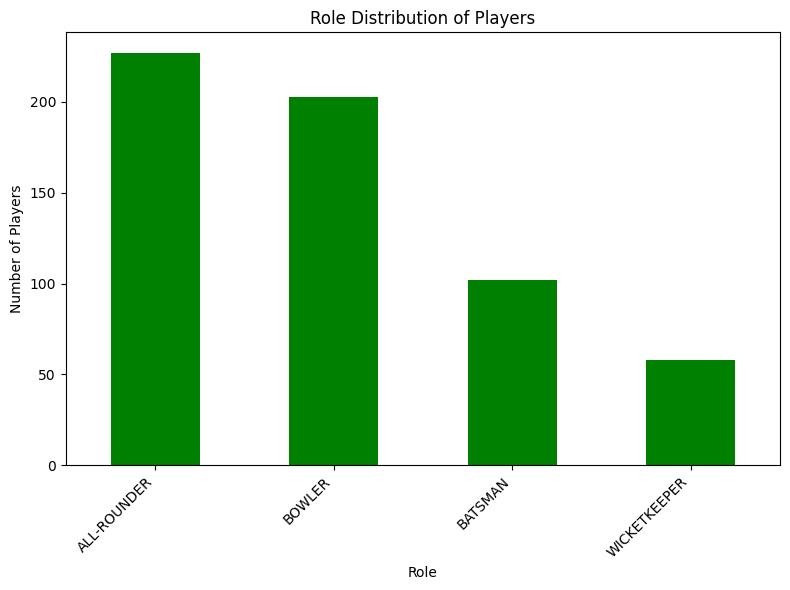

In [16]:
#2B. Role Distribution
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the distribution of players by role
role_distribution = auction_data['Role'].value_counts()

# Plot the role distribution
plt.figure(figsize=(8, 6))
role_distribution.plot(kind='bar', color='green')
plt.title('Role Distribution of Players')
plt.xlabel('Role')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('2B_iplauctions.jpg')
plt.show()


In [18]:
#2C. Country-wise Player Distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Country-wise Player Distribution: Find the number of players from each country
country_distribution = auction_data['Country'].value_counts()

# Filter the dataset to include only players who have been sold
sold_players = auction_data[auction_data['Selling_Price'] > 0]
sold_country_distribution = sold_players['Country'].value_counts()

# Set up a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Country-wise Player Distribution
sns.barplot(x=country_distribution.index, y=country_distribution.values, color='blue', ax=axes[0])
axes[0].set_title('Country-wise Registered Players Distribution')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Players')
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on top of each bar for the first plot
for i, value in enumerate(country_distribution.values):
    axes[0].text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Plot Country-wise Sold Players Distribution
sns.barplot(x=sold_country_distribution.index, y=sold_country_distribution.values, color='green', ax=axes[1])
axes[1].set_title('Country-wise Sold Players Distribution')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Players Sold')
axes[1].tick_params(axis='x', rotation=45)

# Add value labels on top of each bar for the second plot
for i, value in enumerate(sold_country_distribution.values):
    axes[1].text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('2C_iplauctions.jpg')
plt.show()



<class 'ModuleNotFoundError'>: No module named 'seaborn'

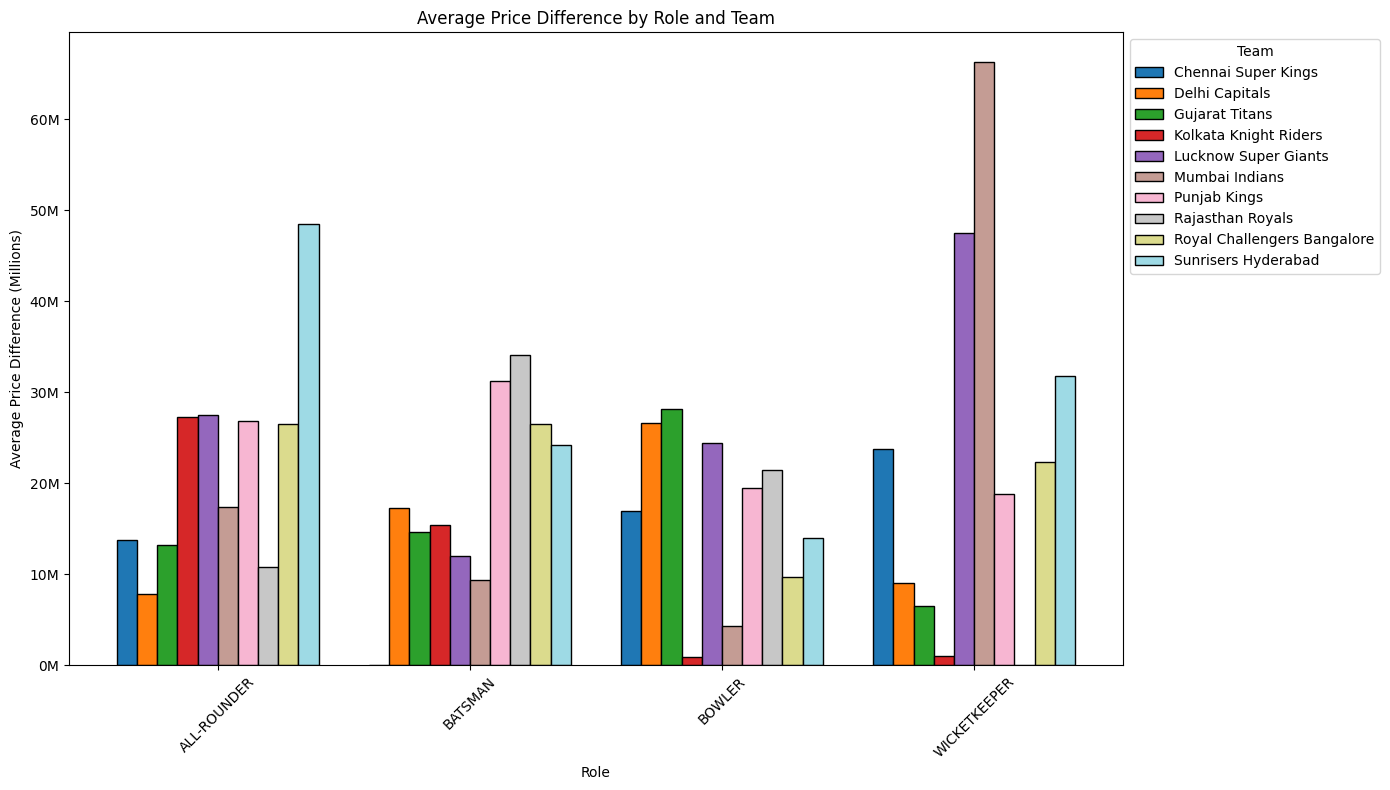

In [19]:
#3A.Analyze the difference between base price and selling price across different roles and teams. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Removing 'N.A.' values from 'Role' and 'Team'
auction_data = auction_data[~auction_data['Role'].str.contains('N.A.', na=False)]
auction_data = auction_data[~auction_data['Team'].str.contains('N.A.', na=False)]

# Calculating Price Difference
auction_data['Price_Difference'] = auction_data['Selling_Price'] - auction_data['Base_Price']
avg_diff_role_team = auction_data.groupby(['Role', 'Team'])['Price_Difference'].mean().unstack().fillna(0)
avg_diff_role_team /= 1_000_000  # Converting to millions

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab20(np.linspace(0, 1, len(avg_diff_role_team.columns)))
width = 0.8 / len(avg_diff_role_team.columns)
x = np.arange(len(avg_diff_role_team.index))

for i, (team, color) in enumerate(zip(avg_diff_role_team.columns, colors)):
    ax.bar(x + i * width, avg_diff_role_team[team], width, label=f'{team}', color=color, edgecolor='black')

# Formatter for Y-axis
def millions(x, pos):
    return f'{int(x)}M'

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Axis Labels and Title
ax.set_xlabel('Role')
ax.set_ylabel('Average Price Difference (Millions)')
ax.set_title('Average Price Difference by Role and Team')
ax.set_xticks(x + width * (len(avg_diff_role_team.columns) - 1) / 2)
ax.set_xticklabels(avg_diff_role_team.index, rotation=45)
ax.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()



In [21]:
#3B.Identify players with the highest price differences (selling price minus base price). 
import numpy as np
import pandas as pd

# Filter out rows where 'Bid' is 'UNSOLD' and 'Team' is 'N.A.'
filtered_data = auction_data[(auction_data['Bid'] != 'UNSOLD') & (auction_data['Team'] != 'N.A')].copy()

# Convert 'Selling_Price' to integer (no decimal places)
filtered_data['Selling_Price'] = filtered_data['Selling_Price'].astype(int)

# Calculate the price difference
filtered_data['Price Difference'] = filtered_data['Selling_Price'] - filtered_data['Base_Price']

# Top Earners: Identify players with the highest price differences
top_earners = filtered_data[['Player Name', 'Role', 'Country', 'Selling_Price', 'Team', 'Price Difference']] \
    .sort_values(by='Price Difference', ascending=False).head(10)

# Display top earners in the specified format
print("Top Earners:")
print(top_earners[['Player Name', 'Role', 'Country', 'Selling_Price', 'Team']].to_string(index=False))


Top Earners:
      Player Name         Role     Country  Selling_Price                        Team
     Ishan Kishan WICKETKEEPER       India      152500000              Mumbai Indians
    Deepak Chahar       BOWLER       India      140000000         Chennai Super Kings
 Liam Livingstone  ALL-ROUNDER     England      115000000                Punjab Kings
     Shreyas Iyer      BATSMAN       India      122500000       Kolkata Knight Riders
       Avesh Khan       BOWLER       India      100000000        Lucknow Super Giants
Wanindu Hasaranga  ALL-ROUNDER   Sri Lanka      107500000 Royal Challengers Bangalore
  Nicholas Pooran WICKETKEEPER West Indies      107500000         Sunrisers Hyderabad
  Prasidh Krishna       BOWLER       India      100000000            Rajasthan Royals
   Shardul Thakur       BOWLER       India      107500000              Delhi Capitals
    Harshal Patel  ALL-ROUNDER       India      107500000 Royal Challengers Bangalore


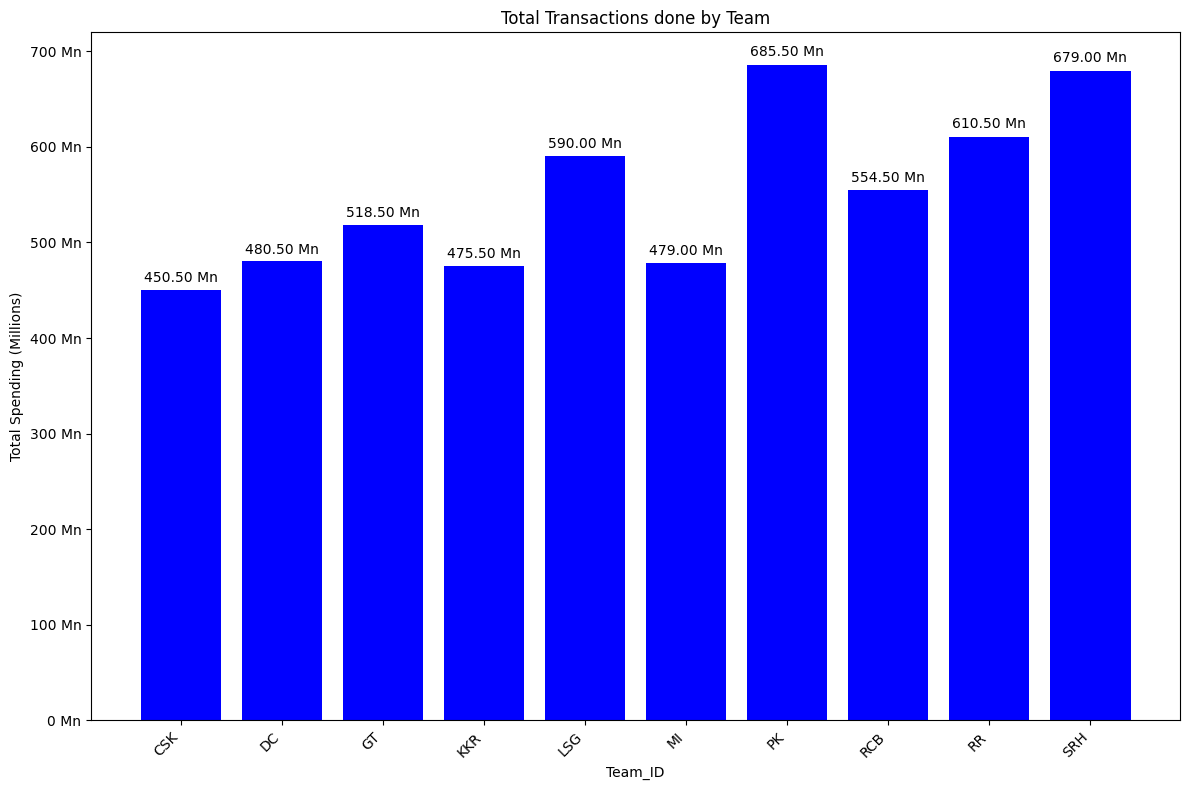

In [16]:
# 4. Team Analysis
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming auction_data is already loaded and cleaned
filtered_df = auction_data[(auction_data['Role'] != 'N.A.') & (auction_data['Team'] != 'N.A.')]

team_spending = filtered_df.groupby('Team_ID')['Selling_Price'].sum()

def format_spending(value):
    if value >= 1_000_000_000:
        return f'{value / 1_000_000_000:.2f} Bn'
    else:
        return f'{value / 1_000_000:.2f} Mn'

# Convert to millions for plotting
team_spending_millions = team_spending / 1_000_000

plt.figure(figsize=(12, 8))
bars = plt.bar(team_spending.index, team_spending_millions, color='blue')

plt.xlabel('Team_ID')
plt.ylabel('Total Spending (Millions)')
plt.title('Total Transactions done by Team')
plt.xticks(rotation=45, ha='right')

# Annotating bars with formatted values
for bar, value in zip(bars, team_spending):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01 * bar.get_height(), 
             format_spending(value), ha='center', va='bottom')

# Custom y-axis formatter to display labels in millions
def millions(x, pos):
    return f'{int(x)} Mn'

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
# plt.savefig('4A_iplauctions.jpg')
plt.show()

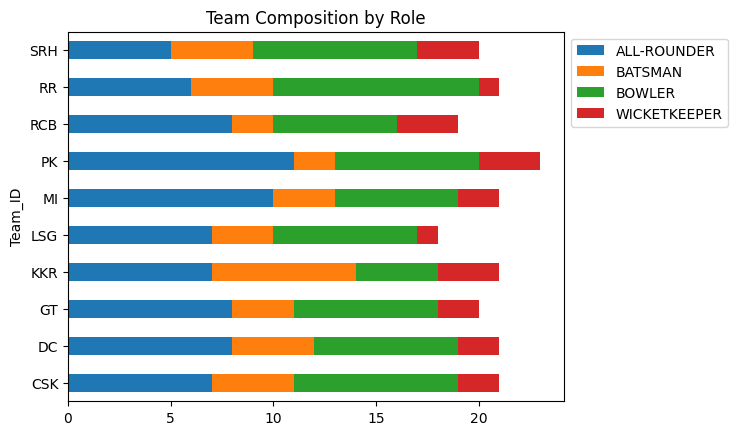

In [44]:
# 4B. Role-wise Team Composition
filtered_df = auction_data[(auction_data['Role'] != 'N.A.') & (auction_data['Team'] != 'N.A.')]
role_composition_by_team = filtered_df.groupby(['Team_ID', 'Role']).size().unstack().fillna(0)
role_composition_by_team.plot(kind='barh', stacked=True, title='Team Composition by Role')

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('4B_iplauctions.jpg')
plt.show()

Sold Players Base Price Statistics (in millions):
count    205.000000
mean       7.473171
std        6.732859
min        2.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       20.000000
Name: Base_Price, dtype: float64

Unsold Players Base Price Statistics (in millions):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Base_Price, dtype: float64


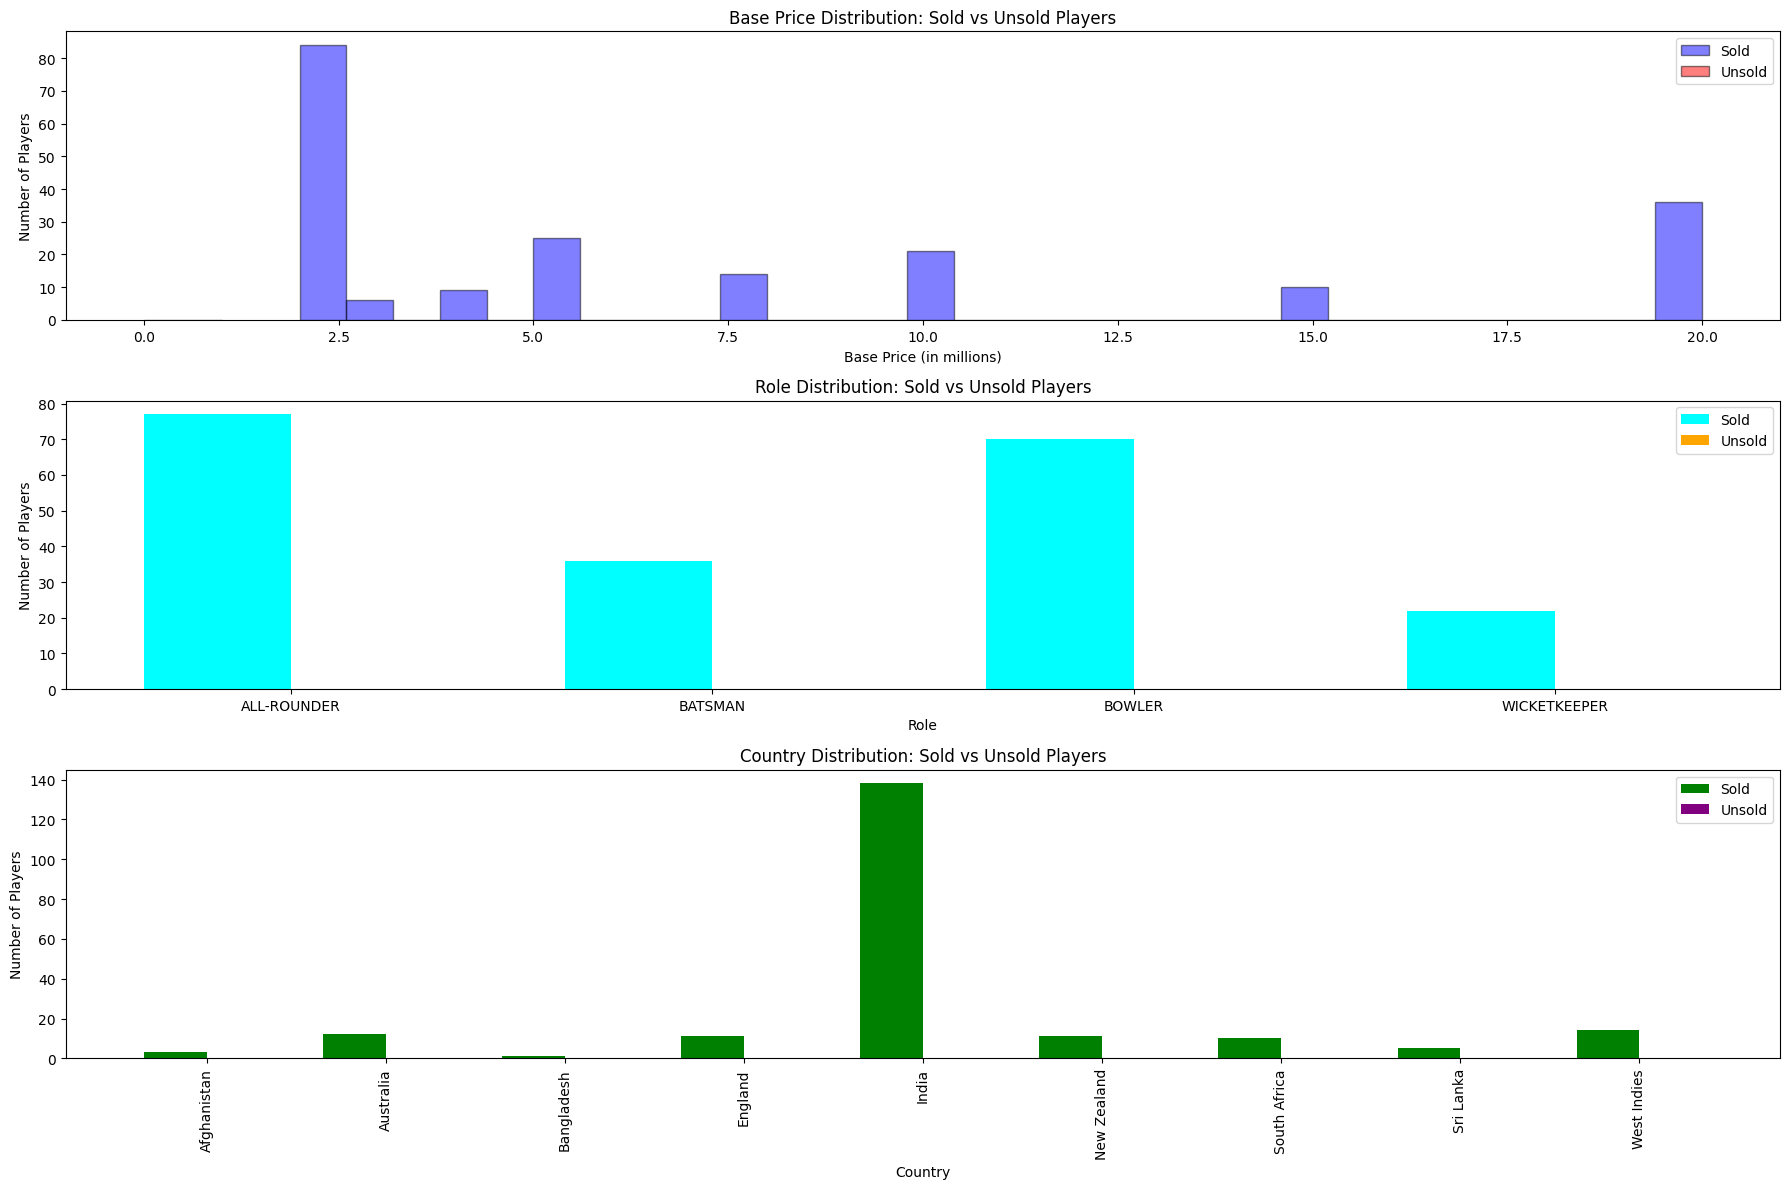

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data into sold and unsold players
sold_players = auction_data[auction_data['Bid'] != 'UNSOLD']
unsold_players = auction_data[auction_data['Bid'] == 'UNSOLD']

# Convert prices to numeric and handle missing values
auction_data['Base_Price'] = pd.to_numeric(auction_data['Base_Price'], errors='coerce')
auction_data['Selling_Price'] = pd.to_numeric(auction_data['Selling_Price'], errors='coerce')

# Clean data
sold_players_clean = sold_players.dropna(subset=['Base_Price', 'Role', 'Country'])
unsold_players_clean = unsold_players.dropna(subset=['Base_Price', 'Role', 'Country'])

# Convert prices to millions
sold_players_clean['Base_Price'] /= 1_000_000
unsold_players_clean['Base_Price'] /= 1_000_000
sold_players_clean['Selling_Price'] /= 1_000_000

# Descriptive statistics
print("Sold Players Base Price Statistics (in millions):")
print(sold_players_clean['Base_Price'].describe())
print("\nUnsold Players Base Price Statistics (in millions):")
print(unsold_players_clean['Base_Price'].describe())

# Visualization
plt.figure(figsize=(18, 12))

# Base Price Distribution
plt.subplot(3, 1, 1)
sns.histplot(sold_players_clean['Base_Price'], bins=30, color='blue', label='Sold', kde=True, alpha=0.5)
sns.histplot(unsold_players_clean['Base_Price'], bins=30, color='red', label='Unsold', kde=True, alpha=0.5)
plt.xlabel('Base Price (in millions)')
plt.ylabel('Number of Players')
plt.title('Base Price Distribution: Sold vs Unsold Players')
plt.legend()

# Role Distribution
plt.subplot(3, 1, 2)
role_data = pd.concat([
    sold_players_clean.assign(Status='Sold'),
    unsold_players_clean.assign(Status='Unsold')
])
sns.countplot(data=role_data, x='Role', hue='Status', palette=['cyan', 'orange'])
plt.xlabel('Role')
plt.ylabel('Number of Players')
plt.title('Role Distribution: Sold vs Unsold Players')
plt.xticks(rotation=45)

# Country Distribution
plt.subplot(3, 1, 3)
sns.countplot(data=role_data, x='Country', hue='Status', palette=['green', 'purple'])
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Country Distribution: Sold vs Unsold Players')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


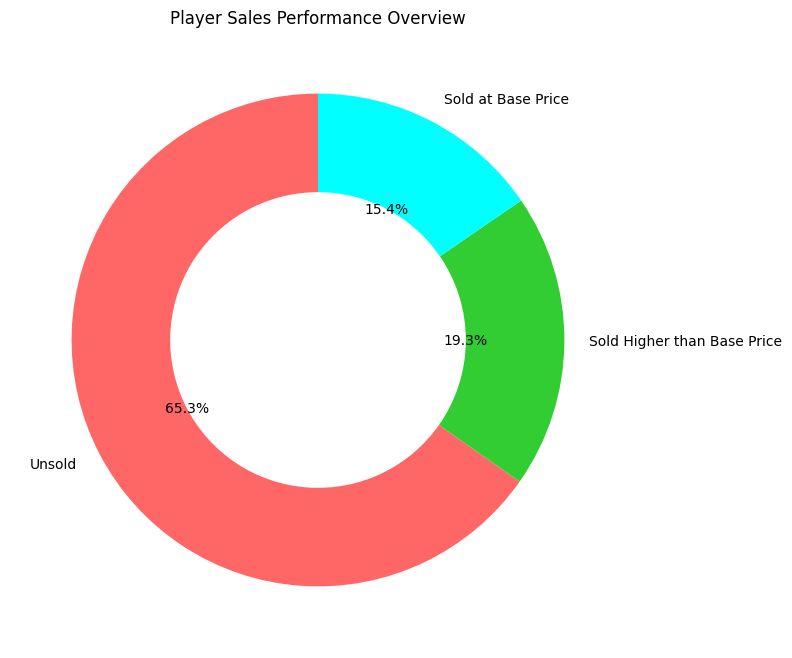

In [45]:
#5B.Player Sales Performance Overview
import pandas as pd
import matplotlib.pyplot as plt

# Categorize the data
auction_data['Sale_Status'] = auction_data.apply(
    lambda row: 'Sold at Base Price' if row['Selling_Price'] == row['Base_Price'] 
    else ('Sold Higher than Base Price' if row['Selling_Price'] > row['Base_Price'] 
    else 'Unsold'), axis=1)

# Count the occurrences in each category
sale_counts = auction_data['Sale_Status'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))
plt.pie(sale_counts, labels=sale_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6666', '#32CD32', '#00FFFF'], wedgeprops=dict(width=0.4))
plt.title('Player Sales Performance Overview')
#plt.savefig('5BI_iplauctions.jpg')
plt.show()

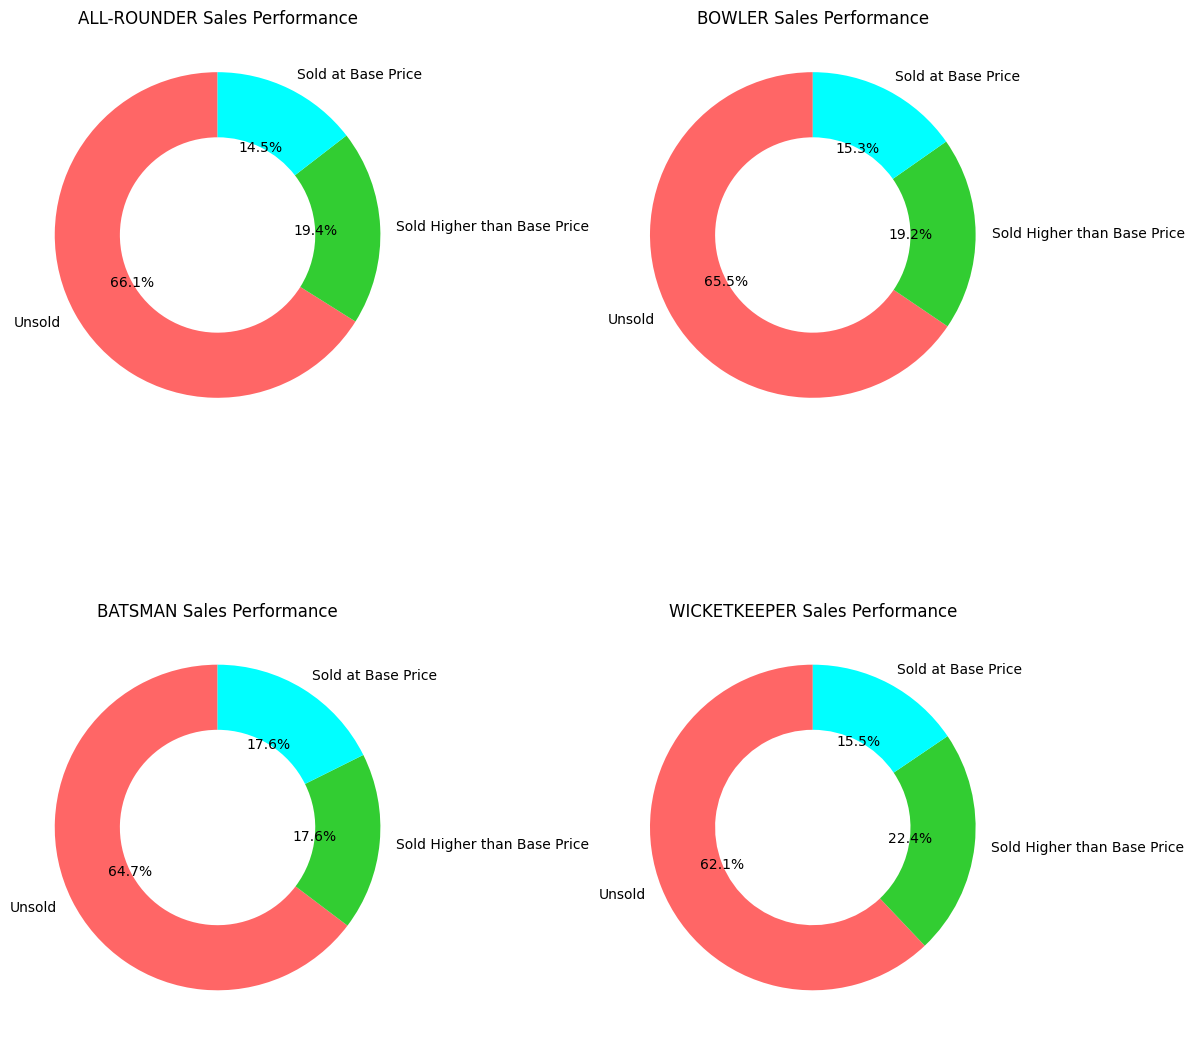

In [46]:
#drilling-down the above tasks into roles.
import pandas as pd
import matplotlib.pyplot as plt


# Categorize the data
auction_data['Sale_Status'] = auction_data.apply(
    lambda row: 'Sold at Base Price' if row['Selling_Price'] == row['Base_Price'] 
    else ('Sold Higher than Base Price' if row['Selling_Price'] > row['Base_Price'] 
    else 'Unsold'), axis=1)

roles = auction_data['Role'].unique()
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Drill down by Role and create donut charts in subplots
for i, role in enumerate(roles[:4]):  # Limiting to 4 roles for the subplot
    role_data = auction_data[auction_data['Role'] == role]
    sale_counts = role_data['Sale_Status'].value_counts()

    # Plot the donut chart
    axs[i].pie(sale_counts, labels=sale_counts.index, autopct='%1.1f%%', startangle=90,
               colors=['#FF6666', '#32CD32', '#00FFFF'], wedgeprops=dict(width=0.4))
    axs[i].set_title(f'{role} Sales Performance')

# Adjust layout to avoid overlap
plt.tight_layout()
#plt.savefig('5BII_iplauctions.jpg')
plt.show()


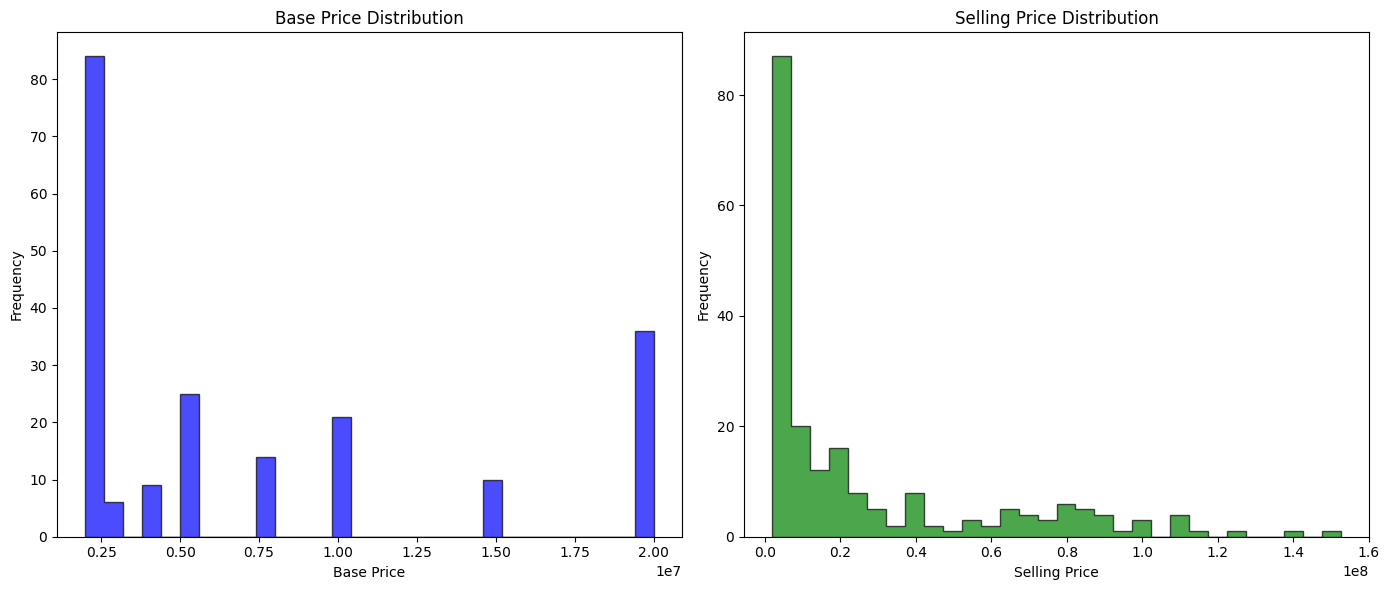

In [38]:
"""
6A. Price Distribution: Create histograms for base price and selling price. 
"""
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'auction_data' is your DataFrame with the given columns
# auction_data = pd.read_csv('your_dataset.csv')  # If loading from a CSV file

# Convert 'Base_Price' and 'Selling_Price' to numeric
auction_data['Base_Price'] = pd.to_numeric(auction_data['Base_Price'], errors='coerce')
auction_data['Selling_Price'] = pd.to_numeric(auction_data['Selling_Price'], errors='coerce')

# Drop rows with NaN values after conversion
auction_data_clean = auction_data.dropna(subset=['Base_Price', 'Selling_Price'])

# Define the bin edges
min_base_price = auction_data_clean['Base_Price'].min()
max_base_price = auction_data_clean['Base_Price'].max()
min_selling_price = auction_data_clean['Selling_Price'].min()
max_selling_price = auction_data_clean['Selling_Price'].max()

# Use a fixed number of bins for consistency
num_bins = 30

# Plotting histograms for Base_Price and Selling_Price
plt.figure(figsize=(14, 6))

# Histogram for Base_Price
plt.subplot(1, 2, 1)
plt.hist(
    auction_data_clean['Base_Price'],
    bins=num_bins,
    color='blue',
    alpha=0.7,
    edgecolor='black',
    histtype='stepfilled'
)
plt.title('Base Price Distribution')
plt.xlabel('Base Price')
plt.ylabel('Frequency')

# Histogram for Selling_Price
plt.subplot(1, 2, 2)
plt.hist(
    auction_data_clean['Selling_Price'],
    bins=num_bins,
    color='green',
    alpha=0.7,
    edgecolor='black',
    histtype='stepfilled'
)
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.tight_layout()
#plt.savefig('6A_iplauctions.jpg')
plt.show()


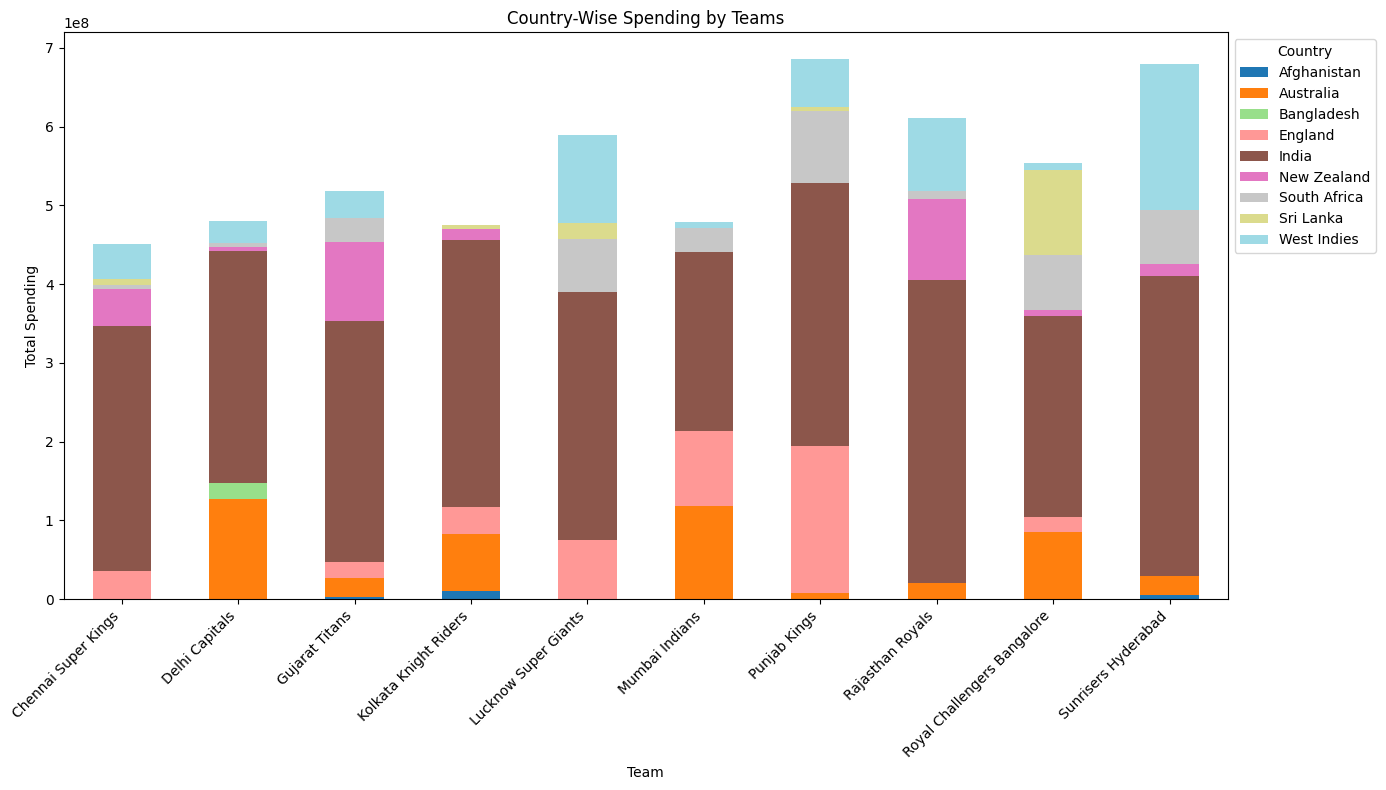

In [39]:
"""
6B. Country-wise Spending: Visualize spending by teams on players from different countries.
"""
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'auction_data' is your DataFrame with the given columns
# auction_data = pd.read_csv('your_dataset.csv')  # If loading from a CSV file

# Convert 'Base_Price' and 'Selling_Price' to numeric
auction_data['Base_Price'] = pd.to_numeric(auction_data['Base_Price'], errors='coerce')
auction_data['Selling_Price'] = pd.to_numeric(auction_data['Selling_Price'], errors='coerce')

# Drop rows with NaN values in relevant columns and where 'Bid' is 'UNSOLD'
auction_data_clean = auction_data.dropna(subset=['Country', 'Team', 'Selling_Price'])
auction_data_clean = auction_data_clean[auction_data_clean['Bid'] != 'UNSOLD']

# Calculate total spending by Team and Country
auction_data_clean['Spending'] = auction_data_clean['Selling_Price']
spending_by_country_team = auction_data_clean.groupby(['Team', 'Country'])['Spending'].sum().unstack(fill_value=0)

# Plotting the spending
plt.figure(figsize=(14, 8))

# Use a vibrant color map
colors = plt.cm.get_cmap('tab20', len(spending_by_country_team.columns))

spending_by_country_team.plot(kind='bar', stacked=True, colormap=colors, ax=plt.gca())

plt.title('Country-Wise Spending by Teams')
plt.xlabel('Team')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
#plt.savefig('6B_iplauctions.jpg')
plt.show()



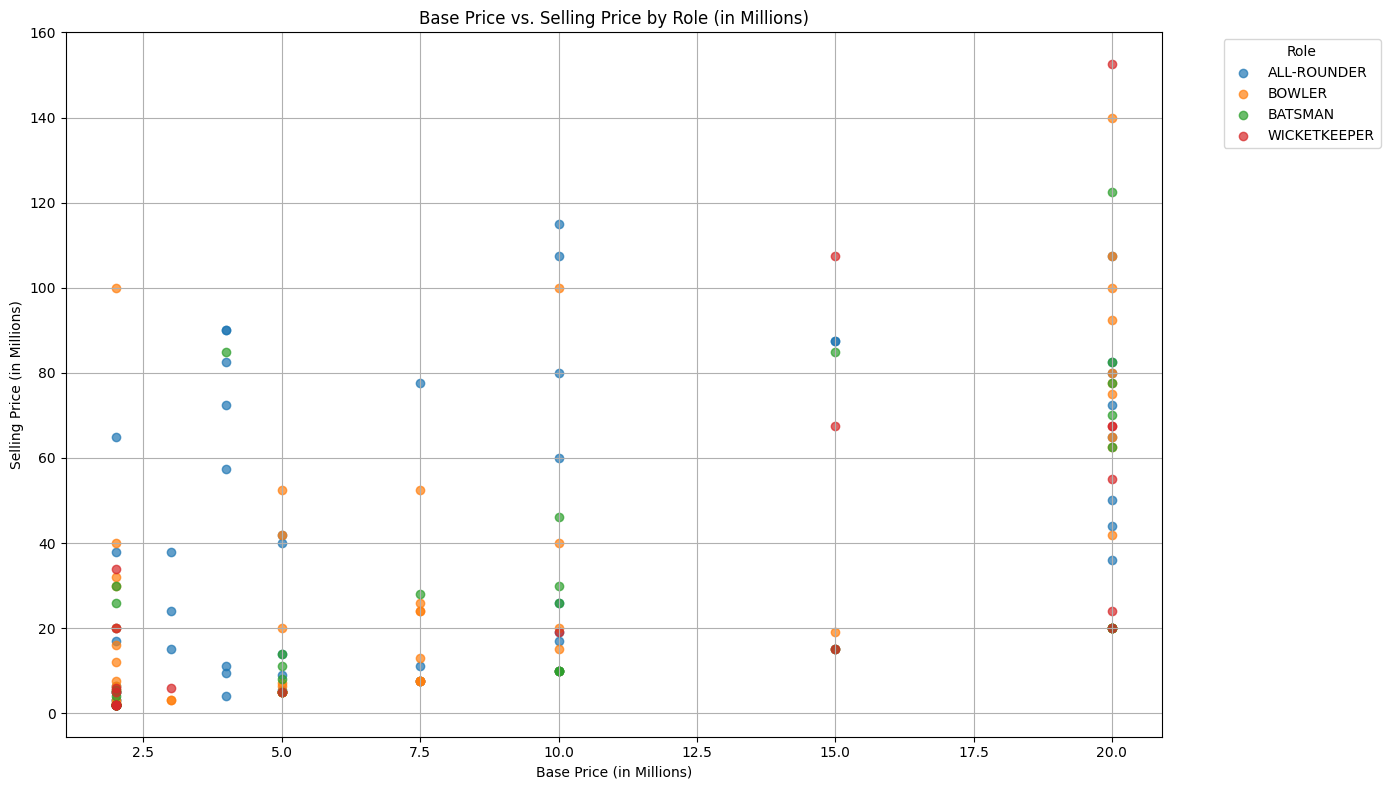

In [40]:
"""
6C. Player Price Comparison: Scatter plot showing base price vs. selling price for different roles. 
"""
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'auction_data' is your DataFrame with the given columns
# auction_data = pd.read_csv('your_dataset.csv')  # If loading from a CSV file

# Convert 'Base_Price' and 'Selling_Price' to numeric
auction_data['Base_Price'] = pd.to_numeric(auction_data['Base_Price'], errors='coerce')
auction_data['Selling_Price'] = pd.to_numeric(auction_data['Selling_Price'], errors='coerce')

# Convert 'Base_Price' and 'Selling_Price' to millions
auction_data['Base_Price'] /= 1_000_000
auction_data['Selling_Price'] /= 1_000_000

# Drop rows with NaN values after conversion
auction_data_clean = auction_data.dropna(subset=['Base_Price', 'Selling_Price', 'Role'])

# Plotting the scatter plot
plt.figure(figsize=(14, 8))

# Scatter plot with different colors for different roles
for role in auction_data_clean['Role'].unique():
    role_data = auction_data_clean[auction_data_clean['Role'] == role]
    plt.scatter(
        role_data['Base_Price'],
        role_data['Selling_Price'],
        label=role,
        alpha=0.7
    )

plt.title('Base Price vs. Selling Price by Role (in Millions)')
plt.xlabel('Base Price (in Millions)')
plt.ylabel('Selling Price (in Millions)')
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
#plt.savefig('6C_iplauctions.jpg')
plt.show()


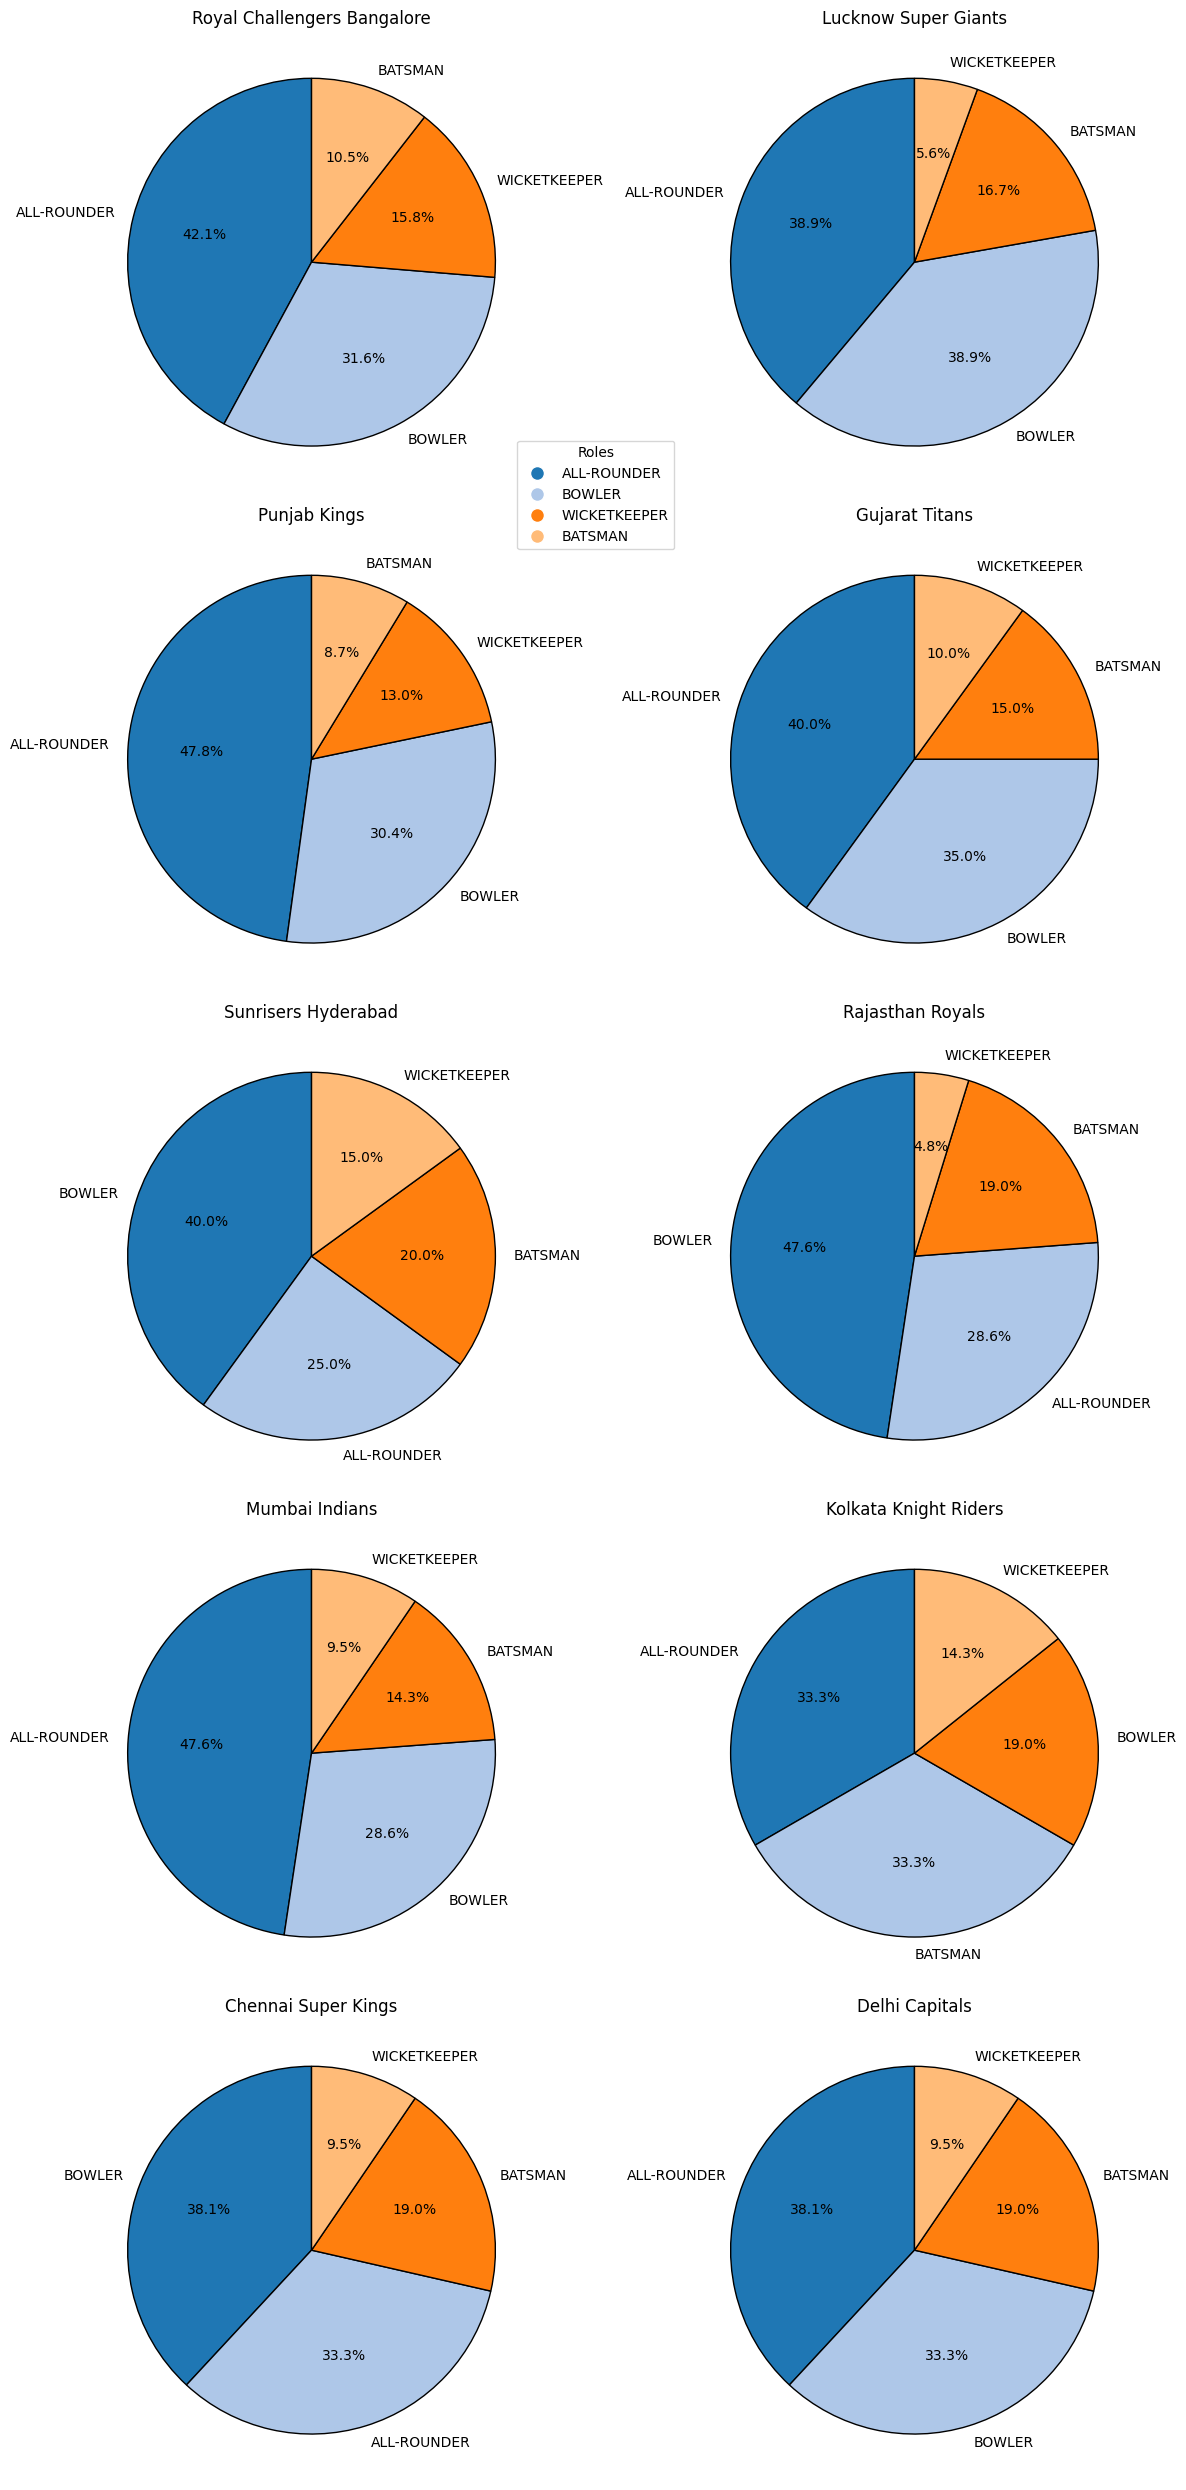

In [54]:
"""
6D. Team Composition: Pie charts or bar charts showing the distribution of roles within teams. 
"""
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'auction_data' is your DataFrame with the given columns
# auction_data = pd.read_csv('your_dataset.csv')  # If loading from a CSV file

# Convert 'Bid' to string in case it’s not
auction_data['Bid'] = auction_data['Bid'].astype(str)

# Drop rows with NaN values in the relevant columns and where 'Bid' is 'UNSOLD'
auction_data_clean = auction_data.dropna(subset=['Role', 'Team'])
auction_data_clean = auction_data_clean[auction_data_clean['Bid'] != 'UNSOLD']

# Create a list of teams (assuming you have exactly 10 teams)
teams = auction_data_clean['Team'].unique()
teams = teams[:10]  # Limit to 10 teams

# Initialize a dictionary to collect labels and colors for the legend
role_labels = {}
colors = plt.cm.tab20.colors

# Plotting pie charts for each team
fig, axes = plt.subplots(5, 2, figsize=(12, 25))  # 5 rows and 2 columns of subplots
axes = axes.flatten()  # Flatten to easily iterate over

for ax, team in zip(axes, teams):
    team_data = auction_data_clean[auction_data_clean['Team'] == team]
    role_counts = team_data['Role'].value_counts()
    
    wedges, texts, autotexts = ax.pie(
        role_counts,
        labels=role_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_ylabel('')  # Remove default ylabel
    ax.set_title(f'{team}')
    
    # Collect labels and colors for the legend
    for text in texts:
        role_labels[text.get_text()] = text.get_color()

# Create a common legend
fig.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
             for color in colors[:len(role_labels)]],
    labels=role_labels.keys(),
    loc='center',
    bbox_to_anchor=(0.5, 0.8),
    title='Roles'
)

# Hide any unused subplots if there are fewer than 10 teams
for ax in axes[len(teams):]:
    ax.axis('off')

plt.tight_layout()
plt.savefig('6D11_iplauctions.jpg')
plt.show()


               Base_Price  Selling_Price      Role   Country
Base_Price       1.000000       0.619111  0.109418 -0.014387
Selling_Price    0.619111       1.000000  0.000499  0.063360
Role             0.109418       0.000499  1.000000 -0.100598
Country         -0.014387       0.063360 -0.100598  1.000000


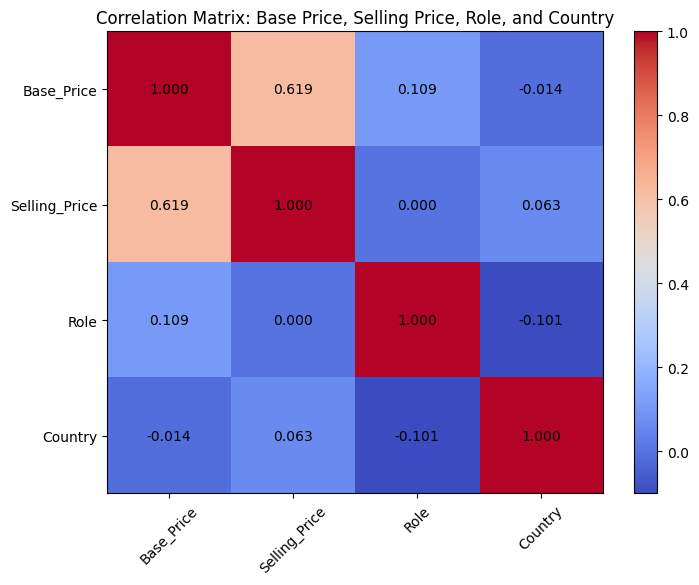

In [42]:
"""
7. Correlation Analysis: Explore correlations between base price, selling price, and other attributes (like role or country). 
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Encode categorical variables
encoded_data = auction_data.copy()

# Convert 'Role' and 'Country' into numerical codes
encoded_data['Role'] = encoded_data['Role'].astype('category').cat.codes
encoded_data['Country'] = encoded_data['Country'].astype('category').cat.codes

# Selecting relevant columns for correlation analysis
correlation_data = encoded_data[['Base_Price', 'Selling_Price', 'Role', 'Country']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()

# Add ticks and labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Annotate each cell with the correlation value (3 decimal places)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix: Base Price, Selling Price, Role, and Country')
#plt.savefig('7_iplauctions.jpg')
plt.show()
